<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/Mediapipe%20Face%2C%20Hand%2C%20Pose%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import mediapipe as mp
import time


Face Mesh

In [4]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

cap = cv2.VideoCapture("face.mp4")

with mp_face_mesh.FaceMesh(min_detection_confidence=0.5,
                           min_tracking_confidence=0.5) as face_mesh:

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        start = time.time()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mesh = face_mesh.process(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        if mesh.multi_face_landmarks:
            for face_landmarks in mesh.multi_face_landmarks:
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_TESSELATION,
                                          landmark_drawing_spec=drawing_spec,
                                          connection_drawing_spec=drawing_spec)

        end = time.time()
        total_time = end - start

        if total_time == 0:
            total_time = 1

        fps = 1 / total_time

        cv2.putText(frame,
                    f"FPS:{int(fps)}",
                    (30, 90),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.2,
                    (0, 255, 0),
                    2)

        cv2.imwrite(f"frame_{frame_count:04d}.png", frame)
        frame_count += 1

        if cv2.waitKey(10) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


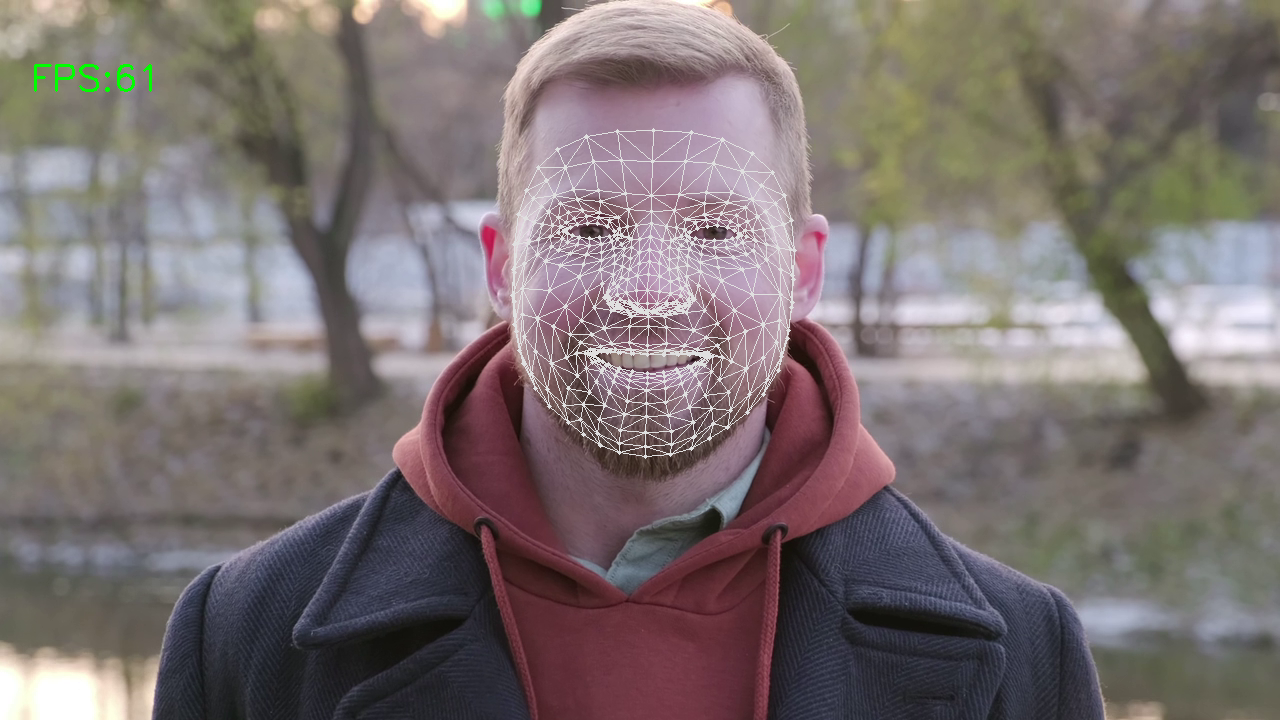

In [8]:
from google.colab.patches import cv2_imshow
face = cv2.imread("/content/frame_0007.png")
cv2_imshow(face)


Hand Pose Estimation

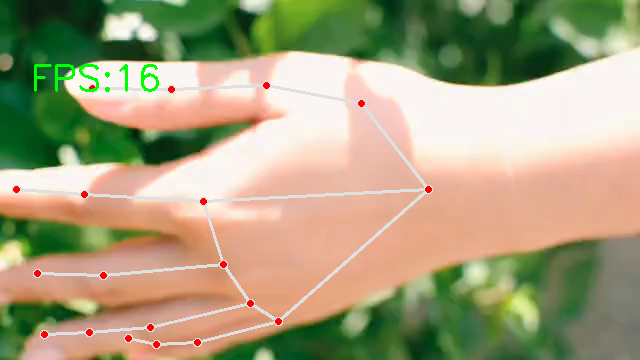

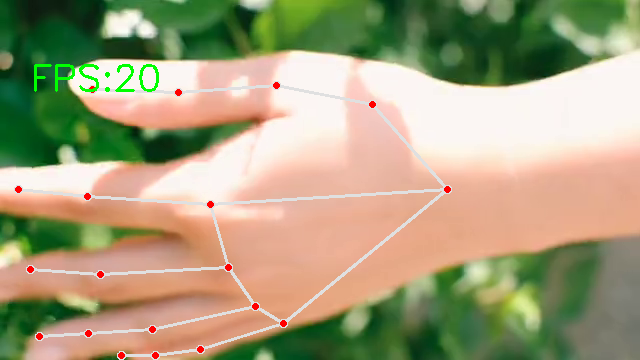

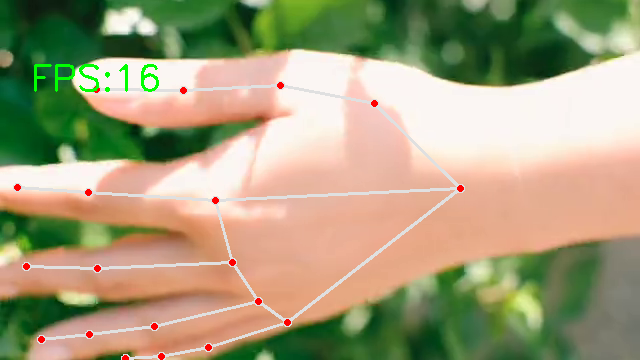

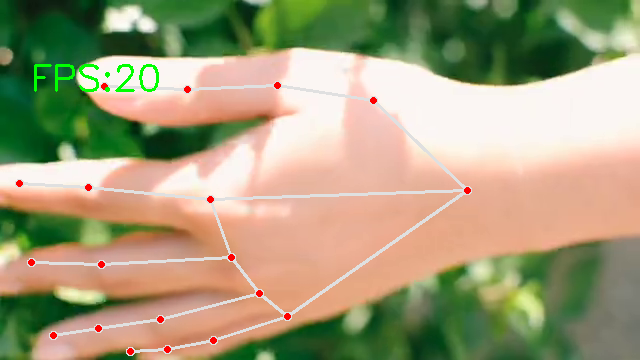

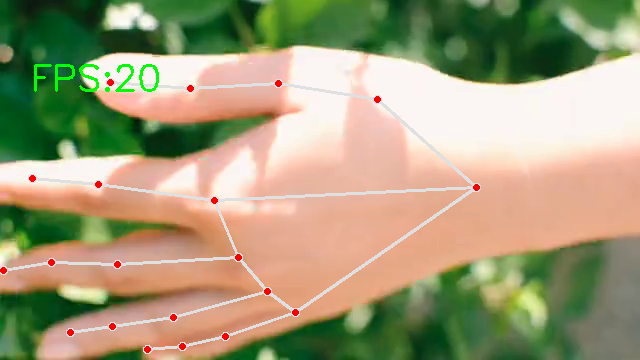

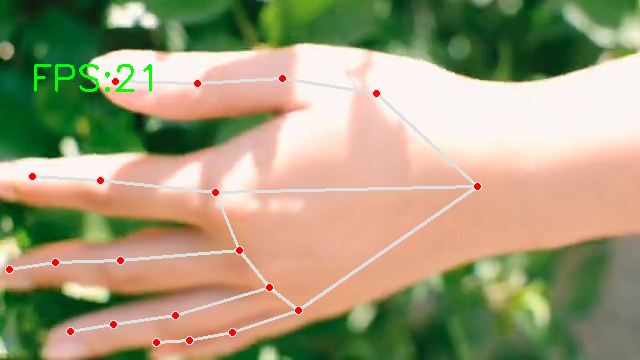

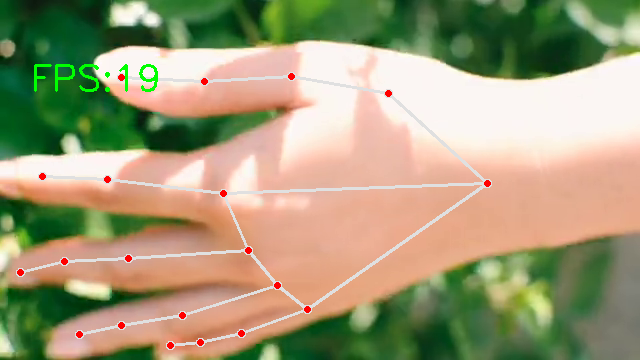

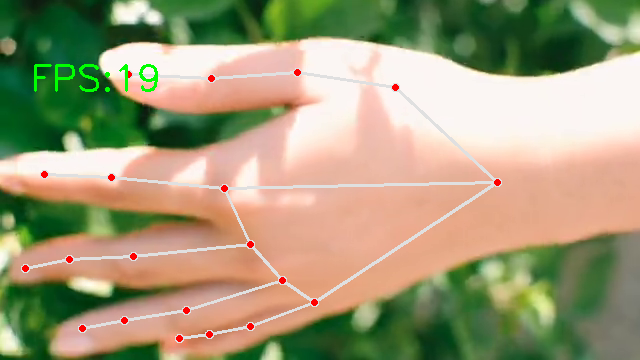

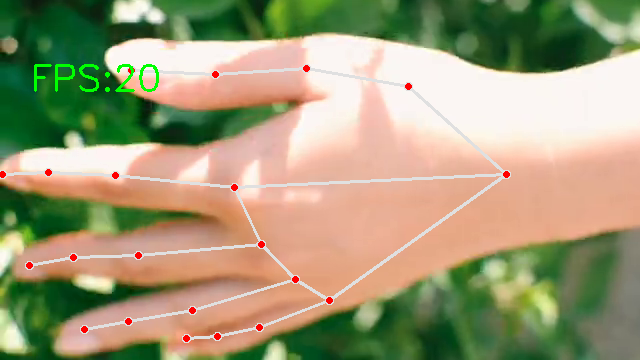

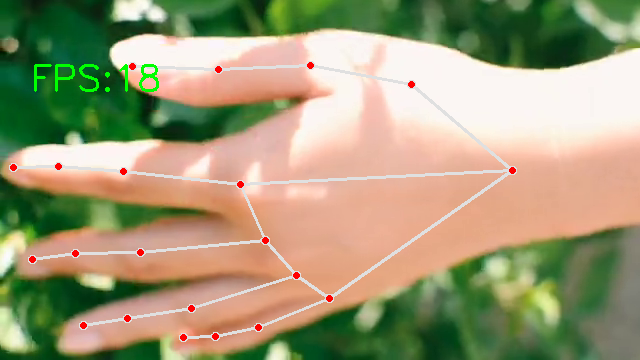

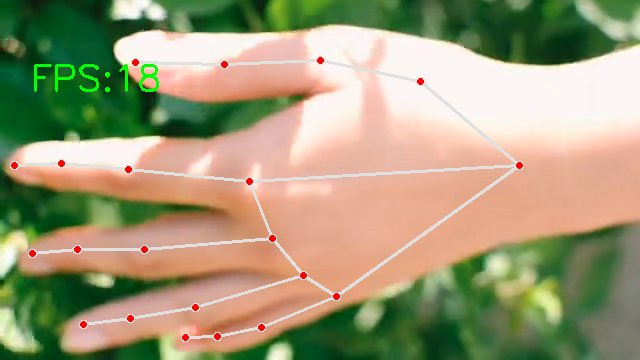

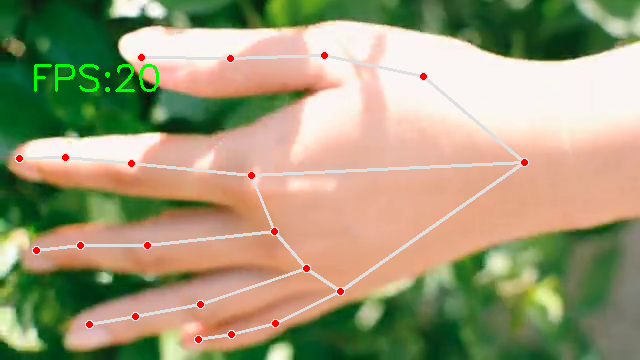

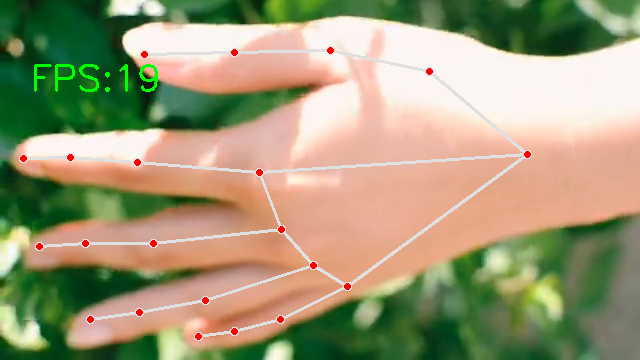

In [ ]:
import cv2
import mediapipe as mp
import time

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture("hand.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # FourCC kodu
out = cv2.VideoWriter('output_hand.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

with mp_hands.Hands(min_detection_confidence=0.5,
                    min_tracking_confidence=0.5) as hands:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        start = time.time()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=hand_landmarks,
                                          connections=mp_hands.HAND_CONNECTIONS)

        end = time.time()
        total_time = end - start

        if total_time == 0:
            total_time = 1

        fps = 1 / total_time

        cv2.putText(frame,
                    f"FPS:{int(fps)}",
                    (30, 90),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.2,
                    (0, 255, 0),
                    2)

        out.write(frame)

        cv2_imshow(frame)
        if cv2.waitKey(10) & 0xFF == ord("q"):
            break

cap.release()
out.release()
cv2.destroyAllWindows()


In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [2]:
import cv2
import mediapipe as mp
import time


In [3]:
import cv2
import mediapipe as mp
import time

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

cap = cv2.VideoCapture("/content/pose.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # FourCC kodu
out = cv2.VideoWriter('output_pose.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

with mp_pose.Pose(min_detection_confidence=0.5,
                  min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        start = time.time()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = pose.process(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(frame,
                                  result.pose_landmarks,
                                  mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

        end = time.time()
        total_time = end - start

        if total_time == 0:
            total_time = 1

        fps = 1 / total_time

        cv2.putText(frame,
                    f"FPS:{int(fps)}",
                    (30, 90),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.2,
                    (0, 255, 0),
                    2)

        out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Saving Videos

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture("hand.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # FourCC kodu
out = cv2.VideoWriter('output_hand.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

with mp_hands.Hands(min_detection_confidence=0.5,
                    min_tracking_confidence=0.5) as hands:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        start = time.time()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=hand_landmarks,
                                          connections=mp_hands.HAND_CONNECTIONS)

        end = time.time()
        total_time = end - start

        if total_time == 0:
            total_time = 1

        fps = 1 / total_time

        cv2.putText(frame,
                    f"FPS:{int(fps)}",
                    (30, 90),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.2,
                    (0, 255, 0),
                    2)

        out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

In [5]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

cap = cv2.VideoCapture("face.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # FourCC kodu
out = cv2.VideoWriter('output_face.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

with mp_face_mesh.FaceMesh(min_detection_confidence=0.5,
                           min_tracking_confidence=0.5) as face_mesh:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        start = time.time()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mesh = face_mesh.process(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        if mesh.multi_face_landmarks:
            for face_landmarks in mesh.multi_face_landmarks:
                mp_drawing.draw_landmarks(image=frame,
                                          landmark_list=face_landmarks,
                                          connections=mp_face_mesh.FACEMESH_TESSELATION,
                                          landmark_drawing_spec=drawing_spec,
                                          connection_drawing_spec=drawing_spec)

        end = time.time()
        total_time = end - start

        if total_time == 0:
            total_time = 1

        fps = 1 / total_time

        cv2.putText(frame,
                    f"FPS:{int(fps)}",
                    (30, 90),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.2,
                    (0, 255, 0),
                    2)

        out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

Youtube video:
https://youtu.be/9vYXc0g361w